In [341]:
# Importing Necessary Modules
# md traj can be installed via conda easily.
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import itertools
import pandas as pd
from scipy import stats

### Loading in Rabbit Original Trajectories

In [388]:
# APO
# Load in trajectory (note I used CPPTRAJ to first combine and strip the trajectories of the water)
original_3W5A = md.load('../archive_50ps_apo_sims/3W5A_original/3W5A_original_strip_50.nc',top = '../archive_50ps_apo_sims/3W5A_original/3W5A_original_strip_top.parm7')
# Use selection criteria to find the atom indices of the regions of the domain that we care about
IM_domain_inds = original_3W5A.top.select('resid 40 to 125 or resid 740 to 991 or resid 240 to 340')
A_domain_inds = original_3W5A.top.select('resid 0 to 40 or resid 125 to 240')
P_domain_inds = original_3W5A.top.select('resid 600 to 740 or resid 340 to 355')
N_domain_inds = original_3W5A.top.select('resid 355 to 600')

# Create a copy of the trajectory using only the specified indicies
IM_domain = original_3W5A.atom_slice(IM_domain_inds, inplace = False)
A_domain = original_3W5A.atom_slice(A_domain_inds, inplace = False)
P_domain = original_3W5A.atom_slice(P_domain_inds, inplace = False)
N_domain = original_3W5A.atom_slice(N_domain_inds, inplace = False)

# Compute the center of mass of the specified domains and calculate the euclidian distance between the centers of mass.
original_A_N_dist = np.linalg.norm(md.compute_center_of_mass(A_domain) - md.compute_center_of_mass(N_domain), axis  = 1)


In [390]:
# ATP
# Load in trajectory (note I used CPPTRAJ to first combine and strip the trajectories of the water)
original_3W5A_ATP = md.load('../3W5A_ATP_original_new_nucleotide/amber/3W5A_original_ATP_strip_150.nc',top = '../3W5A_ATP_original_new_nucleotide/amber/3W5A_original_ATP_strip_top.parm7')
# Use selection criteria to find the atom indices of the regions of the domain that we care about
IM_domain_inds_ATP = original_3W5A_ATP.top.select('resid 40 to 125 or resid 740 to 991 or resid 240 to 340')
A_domain_inds_ATP = original_3W5A_ATP.top.select('resid 0 to 40 or resid 125 to 240')
P_domain_inds_ATP = original_3W5A_ATP.top.select('resid 600 to 740 or resid 340 to 355')
N_domain_inds_ATP = original_3W5A_ATP.top.select('resid 355 to 600')

# Create a copy of the trajectory using only the specified indicies
IM_domain = original_3W5A_ATP.atom_slice(IM_domain_inds_ATP, inplace = False)
A_domain = original_3W5A_ATP.atom_slice(A_domain_inds_ATP, inplace = False)
P_domain = original_3W5A_ATP.atom_slice(P_domain_inds_ATP, inplace = False)
N_domain = original_3W5A_ATP.atom_slice(N_domain_inds_ATP, inplace = False)

# Compute the center of mass of the specified domains and calculate the euclidian distance between the centers of mass.
original_ATP_A_N_dist = np.linalg.norm(md.compute_center_of_mass(A_domain) - md.compute_center_of_mass(N_domain), axis  = 1)


In [392]:
# dATP
# Load in trajectory (note I used CPPTRAJ to first combine and strip the trajectories of the water)
original_3W5A_dATP = md.load('../3W5A_dATP_original_new_nucleotide/amber/3W5A_original_dATP_strip_150.nc',top = '../3W5A_dATP_original_new_nucleotide/amber/3W5A_original_dATP_strip_top.parm7')
# Use selection criteria to find the atom indices of the regions of the domain that we care about
IM_domain_inds_dATP = original_3W5A_dATP.top.select('resid 40 to 125 or resid 740 to 991 or resid 240 to 340')
A_domain_inds_dATP = original_3W5A_dATP.top.select('resid 0 to 40 or resid 125 to 240')
P_domain_inds_dATP = original_3W5A_dATP.top.select('resid 600 to 740 or resid 340 to 355')
N_domain_inds_dATP = original_3W5A_dATP.top.select('resid 355 to 600')

# Create a copy of the trajectory using only the specified indicies
IM_domain = original_3W5A_dATP.atom_slice(IM_domain_inds_dATP, inplace = False)
A_domain = original_3W5A_dATP.atom_slice(A_domain_inds_dATP, inplace = False)
P_domain = original_3W5A_dATP.atom_slice(P_domain_inds_dATP, inplace = False)
N_domain = original_3W5A_dATP.atom_slice(N_domain_inds_dATP, inplace = False)

# Compute the center of mass of the specified domains and calculate the euclidian distance between the centers of mass.
original_dATP_A_N_dist = np.linalg.norm(md.compute_center_of_mass(A_domain) - md.compute_center_of_mass(N_domain), axis  = 1)


### Loading in Human Homology Trajectories

In [393]:
# Load in trajectory (note I used CPPTRAJ to first combine and strip the trajectories of the water)
human_3W5A = md.load('../archive_50ps_apo_sims/3W5A_human/3W5A_human_strip_50.nc',top = '../archive_50ps_apo_sims/3W5A_human/3W5A_human_strip_top.parm7')
# Use selection criteria to find the atom indices of the regions of the domain that we care about
IM_domain_inds = human_3W5A.top.select('resid 40 to 125 or resid 740 to 991 or resid 240 to 340')
A_domain_inds = human_3W5A.top.select('resid 0 to 40 or resid 125 to 240')
P_domain_inds = human_3W5A.top.select('resid 600 to 740 or resid 340 to 355')
N_domain_inds = human_3W5A.top.select('resid 355 to 600')

# Create a copy of the trajectory using only the specified indicies
IM_domain = human_3W5A.atom_slice(IM_domain_inds, inplace = False)
A_domain = human_3W5A.atom_slice(A_domain_inds, inplace = False)
P_domain = human_3W5A.atom_slice(P_domain_inds, inplace = False)
N_domain = human_3W5A.atom_slice(N_domain_inds, inplace = False)

# Compute the center of mass of the specified domains and calculate the euclidian distance between the centers of mass.
human_A_N_dist = np.linalg.norm(md.compute_center_of_mass(A_domain) - md.compute_center_of_mass(N_domain), axis  = 1)


In [394]:
# Load in trajectory (note I used CPPTRAJ to first combine and strip the trajectories of the water)
human_3W5A_ATP = md.load('../3W5A_ATP_human/amber/3W5A_human_ATP_strip_150.nc',top = '../3W5A_ATP_human/amber/3W5A_human_ATP_strip_top.parm7')
# Use selection criteria to find the atom indices of the regions of the domain that we care about
IM_domain_inds_ATP = human_3W5A_ATP.top.select('resid 40 to 125 or resid 740 to 991 or resid 240 to 340')
A_domain_inds_ATP = human_3W5A_ATP.top.select('resid 0 to 40 or resid 125 to 240')
P_domain_inds_ATP = human_3W5A_ATP.top.select('resid 600 to 740 or resid 340 to 355')
N_domain_inds_ATP = human_3W5A_ATP.top.select('resid 355 to 600')

# Create a copy of the trajectory using only the specified indicies
IM_domain = human_3W5A_ATP.atom_slice(IM_domain_inds_ATP, inplace = False)
A_domain = human_3W5A_ATP.atom_slice(A_domain_inds_ATP, inplace = False)
P_domain = human_3W5A_ATP.atom_slice(P_domain_inds_ATP, inplace = False)
N_domain = human_3W5A_ATP.atom_slice(N_domain_inds_ATP, inplace = False)

# Compute the center of mass of the specified domains and calculate the euclidian distance between the centers of mass.
human_ATP_A_N_dist = np.linalg.norm(md.compute_center_of_mass(A_domain) - md.compute_center_of_mass(N_domain), axis  = 1)


In [395]:
# Load in trajectory (note I used CPPTRAJ to first combine and strip the trajectories of the water)
human_3W5A_dATP = md.load('../3W5A_dATP_human/amber/3W5A_human_dATP_strip_150.nc',top = '../3W5A_dATP_human/amber/3W5A_human_dATP_strip_top.parm7')
# Use selection criteria to find the atom indices of the regions of the domain that we care about
IM_domain_inds_dATP = human_3W5A_dATP.top.select('resid 40 to 125 or resid 740 to 991 or resid 240 to 340')
A_domain_inds_dATP = human_3W5A_dATP.top.select('resid 0 to 40 or resid 125 to 240')
P_domain_inds_dATP = human_3W5A_dATP.top.select('resid 600 to 740 or resid 340 to 355')
N_domain_inds_dATP = human_3W5A_dATP.top.select('resid 355 to 600')

# Create a copy of the trajectory using only the specified indicies
IM_domain = human_3W5A_dATP.atom_slice(IM_domain_inds_dATP, inplace = False)
A_domain = human_3W5A_dATP.atom_slice(A_domain_inds_dATP, inplace = False)
P_domain = human_3W5A_dATP.atom_slice(P_domain_inds_dATP, inplace = False)
N_domain = human_3W5A_dATP.atom_slice(N_domain_inds_dATP, inplace = False)

# Compute the center of mass of the specified domains and calculate the euclidian distance between the centers of mass.
human_dATP_A_N_dist = np.linalg.norm(md.compute_center_of_mass(A_domain) - md.compute_center_of_mass(N_domain), axis  = 1)


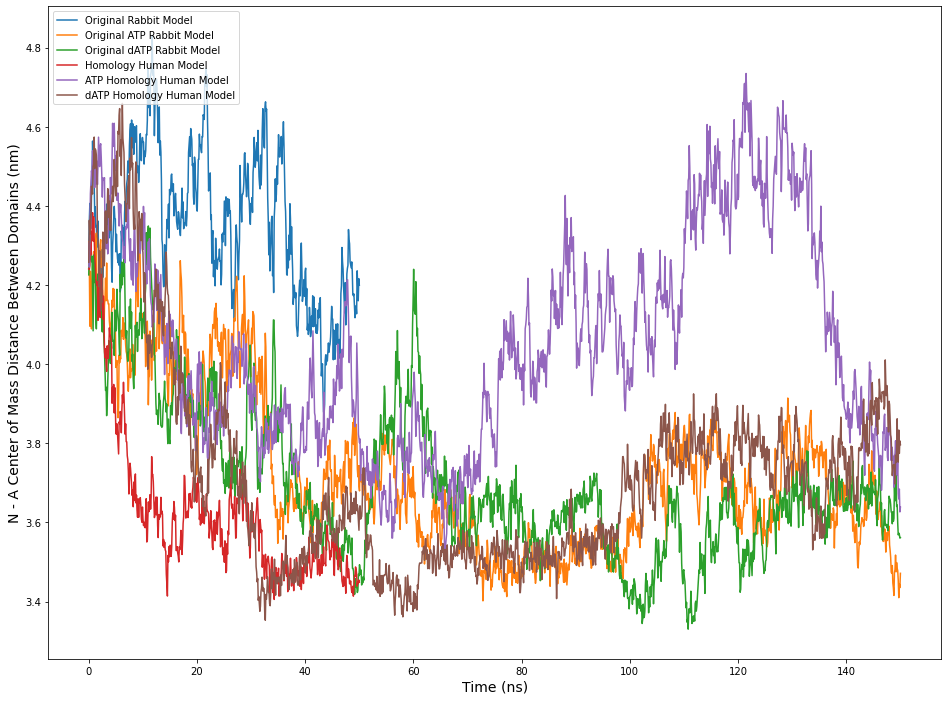

In [412]:
# Plot Results
plt.figure(figsize = (16,12))
plt.plot(np.linspace(0,50,500), original_A_N_dist, label = 'Original Rabbit Model')
plt.plot(np.linspace(0,150,1500), original_ATP_A_N_dist, label = 'Original ATP Rabbit Model')
plt.plot(np.linspace(0,150,1500), original_dATP_A_N_dist, label = 'Original dATP Rabbit Model')
plt.plot(np.linspace(0,50,500), human_A_N_dist, label = 'Homology Human Model')
plt.plot(np.linspace(0,150,1500), human_ATP_A_N_dist, label = 'ATP Homology Human Model')
plt.plot(np.linspace(0,150,1500), human_dATP_A_N_dist, label = 'dATP Homology Human Model')
plt.xlabel('Time (ns)', fontsize = 14)
plt.ylabel('N - A Center of Mass Distance Between Domains (nm)', fontsize = 14)
plt.legend(loc = 'upper left')

Text(0.5, 0, 'N - A distance (A)')

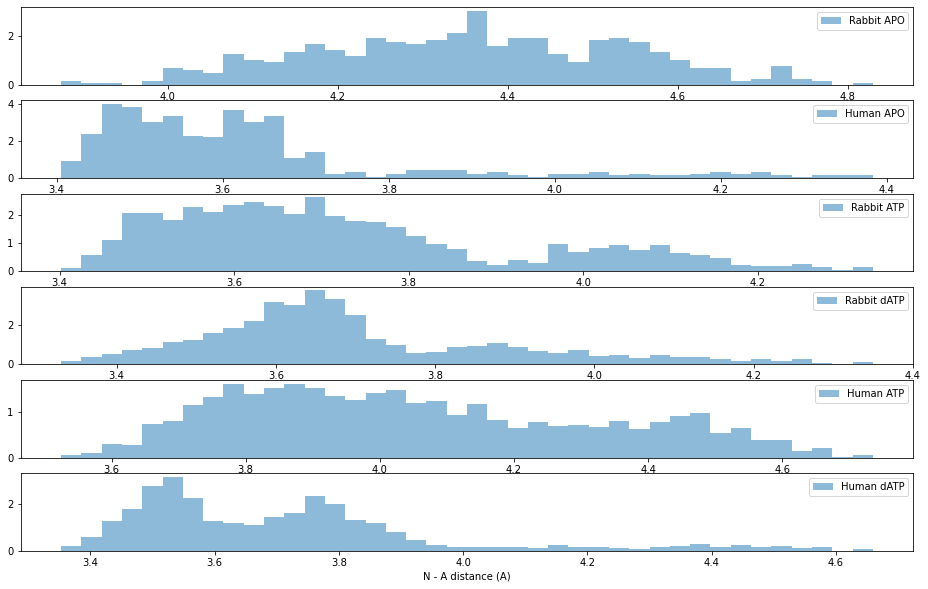

In [400]:
fig, ax = plt.subplots(6,1,figsize = (16,10))


ax[0].hist(original_A_N_dist, bins = 40, alpha = 0.5, density = True, label = 'Rabbit APO')
ax[0].legend()

ax[1].hist(human_A_N_dist, bins = 40, alpha = 0.5, density = True, label = 'Human APO')
ax[1].legend()

ax[2].hist(original_ATP_A_N_dist, bins = 40, alpha = 0.5, density = True, label = 'Rabbit ATP')
ax[2].legend()

ax[3].hist(original_dATP_A_N_dist, bins = 40, alpha = 0.5, density = True, label = 'Rabbit dATP')
ax[3].legend()

ax[4].hist(human_ATP_A_N_dist, bins = 40, alpha = 0.5, density = True, label = 'Human ATP')
ax[4].legend()

ax[5].hist(human_dATP_A_N_dist, bins = 40, alpha = 0.5, density = True, label = 'Human dATP')
ax[5].legend()


plt.xlabel('N - A distance (A)')



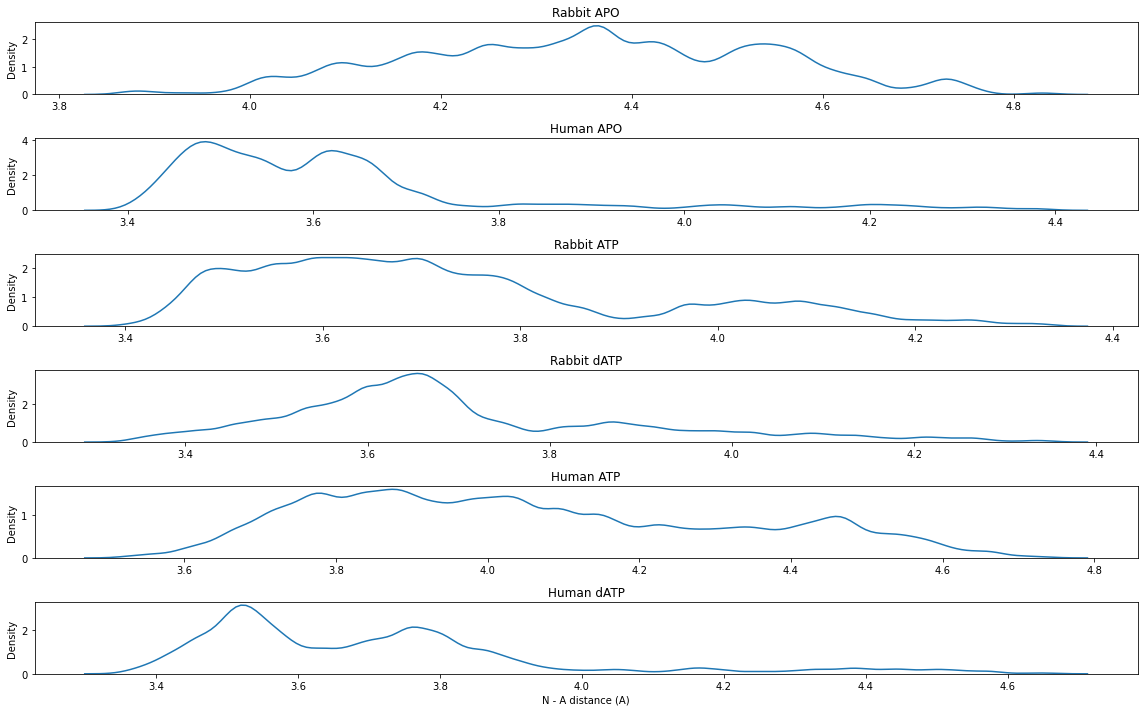

In [425]:
fig, ax = plt.subplots(6,1,figsize = (16,10))


sns.kdeplot(original_A_N_dist, label = 'Rabbit APO', ax = ax[0], bw_adjust = 0.3)
ax[0].set_title('Rabbit APO')

sns.kdeplot(human_A_N_dist, label = 'Human APO', ax = ax[1], bw_adjust = 0.3)
ax[1].set_title('Human APO')

sns.kdeplot(original_ATP_A_N_dist, label = 'Rabbit ATP', ax = ax[2], bw_adjust = 0.3)
ax[2].set_title('Rabbit ATP')

sns.kdeplot(original_dATP_A_N_dist, label = 'Rabbit dATP', ax = ax[3], bw_adjust = 0.3)
ax[3].set_title('Rabbit dATP')


sns.kdeplot(human_ATP_A_N_dist, label = 'Human ATP', ax = ax[4], bw_adjust = 0.3)
ax[4].set_title('Human ATP')

sns.kdeplot(human_dATP_A_N_dist, label = 'Human dATP', ax = ax[5], bw_adjust = 0.3)
ax[5].set_title('Human dATP')





plt.xlabel('N - A distance (A)')
plt.tight_layout()

In [407]:
# Calculate the RMSF for the alpha carbon atoms
orig_rmsf = md.rmsf(original_3W5A, original_3W5A, atom_indices=original_3W5A.top.select('name CA'))
hum_rmsf = md.rmsf(human_3W5A,human_3W5A, atom_indices=human_3W5A.top.select('name CA'))

hum_ATP_rmsf = md.rmsf(human_3W5A_ATP,human_3W5A_ATP, atom_indices=human_3W5A_ATP.top.select('name CA'))
hum_dATP_rmsf = md.rmsf(human_3W5A_dATP,human_3W5A_dATP, atom_indices=human_3W5A_dATP.top.select('name CA'))

orig_ATP_rmsf = md.rmsf(original_3W5A_ATP,original_3W5A_ATP, atom_indices=original_3W5A_ATP.top.select('name CA'))
orig_dATP_rmsf = md.rmsf(original_3W5A_dATP,original_3W5A_dATP, atom_indices=original_3W5A_dATP.top.select('name CA'))

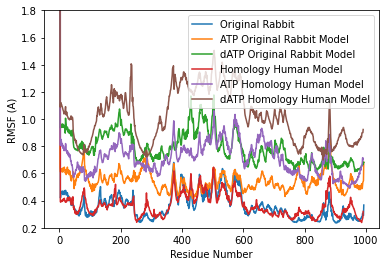

In [408]:
plt.plot(orig_rmsf, label = 'Original Rabbit')
plt.plot(orig_ATP_rmsf, label = 'ATP Original Rabbit Model')
plt.plot(orig_dATP_rmsf, label = 'dATP Original Rabbit Model')

plt.plot(hum_rmsf, label = 'Homology Human Model')
plt.plot(hum_ATP_rmsf, label = 'ATP Homology Human Model')
plt.plot(hum_dATP_rmsf, label = 'dATP Homology Human Model')
plt.legend()
plt.xlabel('Residue Number')
plt.ylim((0.2,1.8))
plt.ylabel('RMSF (A)')
plt.savefig('RMSF_comp.svg')

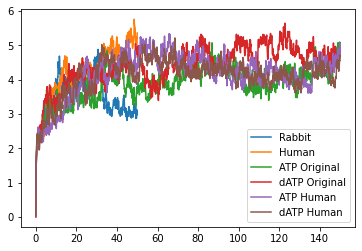

In [411]:
## RMSD Calculations

original_rmsd = md.rmsd(original_3W5A,
                     original_3W5A,
                     frame=0,
                     atom_indices=original_3W5A.top.select('protein'))


plt.plot(np.linspace(0,50,500), original_rmsd*10, label = 'Rabbit')

human_rmsd = md.rmsd(human_3W5A,
                     human_3W5A,
                     frame=0,
                     atom_indices=human_3W5A.top.select('protein'))


plt.plot(np.linspace(0,50,500), human_rmsd*10, label = 'Human')

# Original
ATP_orig_rmsd = md.rmsd(original_3W5A_ATP,
                     original_3W5A_ATP,
                     frame=0,
                     atom_indices=original_3W5A_ATP.top.select('protein'))


plt.plot(np.linspace(0,150,1500), ATP_orig_rmsd*10, label = 'ATP Original')


dATP_orig_rmsd = md.rmsd(original_3W5A_dATP,
                     original_3W5A_dATP,
                     frame=0,
                     atom_indices=original_3W5A_dATP.top.select('protein'))


plt.plot(np.linspace(0,150,1500), dATP_orig_rmsd*10, label = 'dATP Original')
plt.legend()

# Human 
ATP_human_rmsd = md.rmsd(human_3W5A_ATP,
                     human_3W5A_ATP,
                     frame=0,
                     atom_indices=human_3W5A_ATP.top.select('protein'))


plt.plot(np.linspace(0,150,1500), ATP_human_rmsd*10, label = 'ATP Human')


dATP_human_rmsd = md.rmsd(human_3W5A_dATP,
                     human_3W5A_dATP,
                     frame=0,
                     atom_indices=human_3W5A_dATP.top.select('protein'))


plt.plot(np.linspace(0,150,1500), dATP_human_rmsd*10, label = 'dATP Human')
plt.legend()


### Comparison of Rabbit Original Contacts 

In [426]:
original_contacts = list(itertools.product([995], np.arange(0,994)))
# Note: Mg is res 992 therefore need to stop at 991


# contact_original_ATP_dist.shape = n_frames, n_pairs
contact_original_ATP_dist, original_contacts = md.compute_contacts(original_3W5A_ATP, original_contacts, scheme = 'closest')
contact_original_dATP_dist, original_contacts = md.compute_contacts(original_3W5A_dATP, original_contacts, scheme = 'closest')

In [430]:
# Find where contacts come within the threshold for at least one frame in the trajectory 
close_threshold = 0.35
close_min_count = 1

origal_ATP_count_close_contacts = np.where(np.sum(contact_original_ATP_dist < close_threshold, axis = 0)>close_min_count)
origal_ATP_count_close_contacts

origal_dATP_count_close_contacts = np.where(np.sum(contact_original_dATP_dist < close_threshold, axis = 0)>close_min_count)
origal_dATP_count_close_contacts

original_all_close_contacts = np.union1d(origal_ATP_count_close_contacts,origal_dATP_count_close_contacts)

138000

In [435]:
# Create dataframe to store the contact data in

contact_df_column_names = ['Nucleotide','Residue','Frame','Distance']
original_traj_len = len(original_3W5A_ATP)
original_index_len = len(original_all_close_contacts)
# Multiply by two for ATP and dATP
original_all_contact_array = np.zeros((original_traj_len*original_index_len*2, 4))
original_half_point = original_traj_len*original_index_len

for i in range(original_index_len):
    index = original_all_close_contacts[i]
    start = i*original_traj_len
    stop = (i+1)*original_traj_len
    original_all_contact_array[start:stop,1] = int(index)
    original_all_contact_array[start:stop,2] = np.arange(original_traj_len)
    original_all_contact_array[start:stop,3] = contact_original_ATP_dist[:,index]
    
    start = i*traj_len + original_half_point
    stop = (i+1)*traj_len + original_half_point
    original_all_contact_array[start:stop,1] = int(index)
    original_all_contact_array[start:stop,2] = np.arange(original_traj_len)
    original_all_contact_array[start:stop,3] = contact_original_dATP_dist[:,index]

In [440]:
original_contact_df = pd.DataFrame(original_all_contact_array, columns = contact_df_column_names)

original_contact_df['Nucleotide'][0:original_half_point] = 'ATP'
original_contact_df['Nucleotide'][original_half_point:2*original_half_point] = 'dATP'
original_residue_list = ['empty']*len(original_contact_df)
for i in range(original_half_point):
    
    correct_index = int(original_contact_df.loc[i,'Residue'])
    
    original_residue_list[i] = original_3W5A_ATP.top.residue(correct_index).name + ' {}'.format(correct_index+1)
    
    correct_index = int(original_contact_df.loc[original_half_point+i,'Residue'])
    
    original_residue_list[i+original_half_point] = original_3W5A_dATP.top.residue(correct_index).name + ' {}'.format(correct_index+1)
    
original_contact_df['Residue'] = original_residue_list

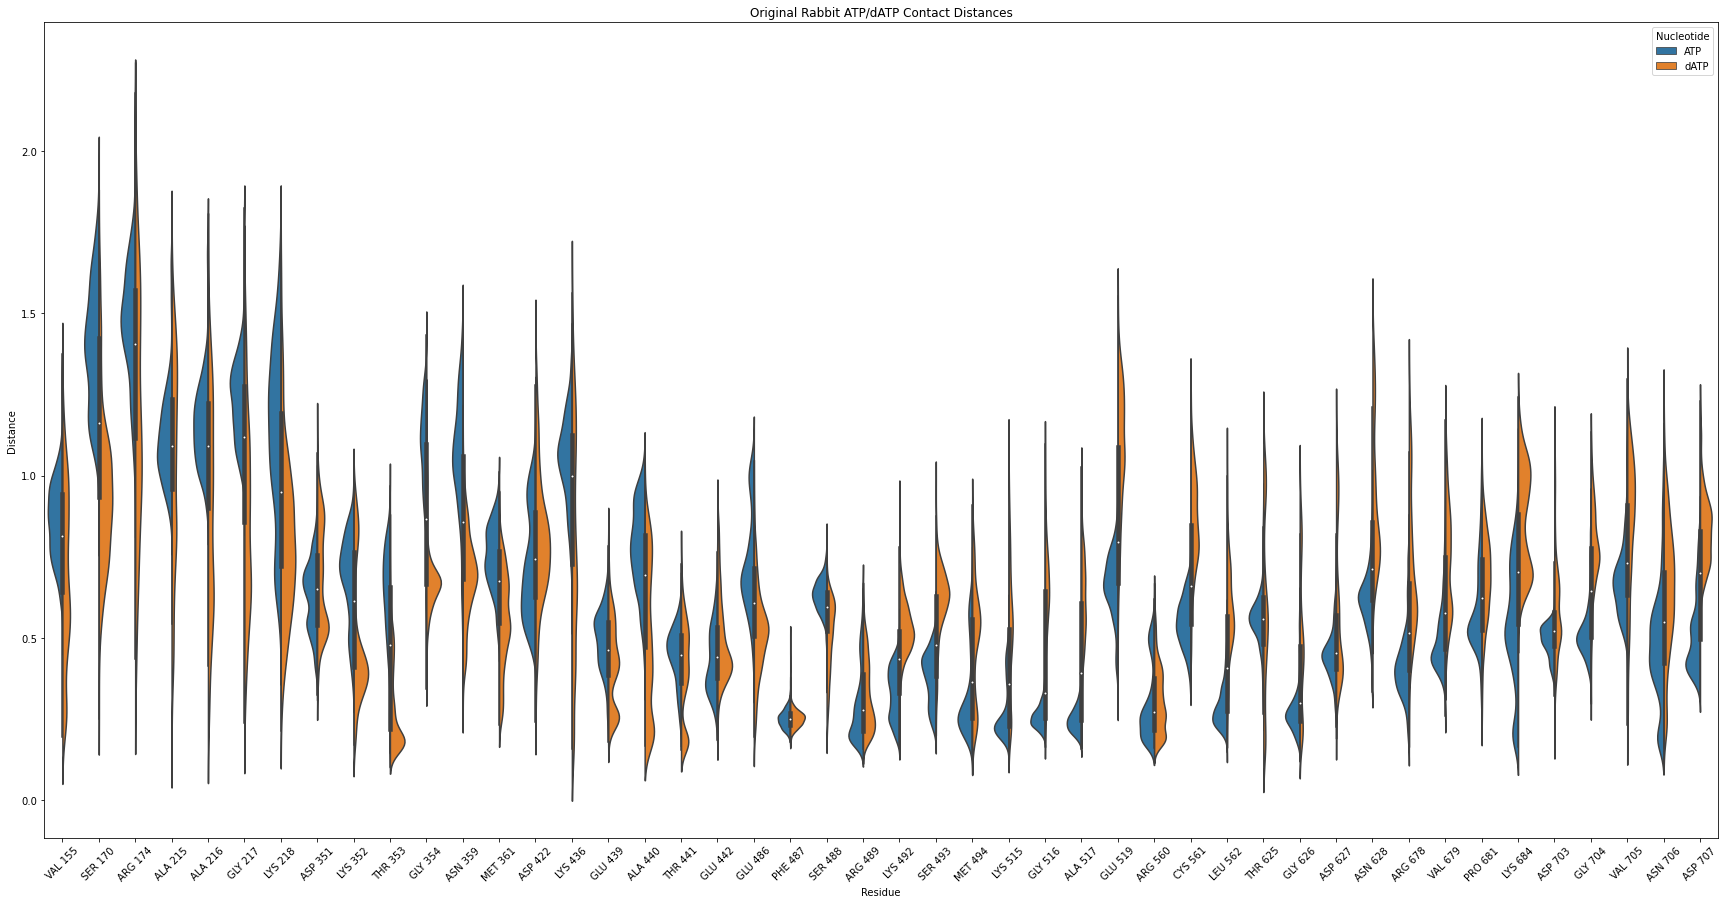

In [471]:
plt.figure(figsize = (30,15))
sns.violinplot(data=original_contact_df, x="Residue", y="Distance", hue="Nucleotide", split = True)
plt.xticks(rotation=45)
plt.title('Original Rabbit ATP/dATP Contact Distances')
plt.show()

### Comparison of Human Contacts

In [288]:
human_contacts = list(itertools.product([993], np.arange(0,992)))
# Note: Mg is res 992 therefore need to stop at 991


# contact_human_ATP_dist.shape = n_frames, n_pairs
contact_human_ATP_dist, human_contacts = md.compute_contacts(human_3W5A_ATP, human_contacts, scheme = 'closest')
contact_human_dATP_dist, human_contacts = md.compute_contacts(human_3W5A_dATP, human_contacts, scheme = 'closest')

In [289]:
human_3W5A_dATP.top.residue(992)

MG992

In [290]:
pairs_human

array([[993,   0],
       [993,   1],
       [993,   2],
       ...,
       [993, 990],
       [993, 991],
       [993, 992]])

In [377]:
close_threshold = 0.35
close_min_count = 1

ATP_count_close_contacts = np.where(np.sum(contact_human_ATP_dist < close_threshold, axis = 0)>close_min_count)
ATP_count_close_contacts

dATP_count_close_contacts = np.where(np.sum(contact_human_dATP_dist < close_threshold, axis = 0)>close_min_count)
dATP_count_close_contacts

(array([350, 351, 352, 438, 440, 441, 485, 486, 488, 491, 492, 493, 513,
        514, 515, 558, 560, 622, 623, 624, 625, 676]),)

In [378]:
all_close_contacts = np.union1d(ATP_count_close_contacts,dATP_count_close_contacts)

In [379]:
contact_df_column_names = ['Nucleotide','Residue','Frame','Distance']
traj_len = len(human_3W5A_ATP)
index_len = len(all_close_contacts)
# Multiply by two for ATP and dATP
all_contact_array = np.zeros((traj_len*index_len*2, 4))
half_point = traj_len*index_len

for i in range(index_len):
    index = all_close_contacts[i]
    start = i*traj_len
    stop = (i+1)*traj_len
    all_contact_array[start:stop,1] = int(index)
    all_contact_array[start:stop,2] = np.arange(traj_len)
    all_contact_array[start:stop,3] = contact_human_ATP_dist[:,index]
    
    start = i*traj_len + half_point
    stop = (i+1)*traj_len + half_point
    all_contact_array[start:stop,1] = int(index)
    all_contact_array[start:stop,2] = np.arange(traj_len)
    all_contact_array[start:stop,3] = contact_human_dATP_dist[:,index]
    

In [380]:
contact_df = pd.DataFrame(all_contact_array, columns = contact_df_column_names)
contact_df['Nucleotide'][0:half_point] = 'ATP'
contact_df['Nucleotide'][half_point:2*half_point] = 'dATP'
residue_list = ['empty']*len(contact_df)
for i in range(half_point):
    
    correct_index = int(contact_df.loc[i,'Residue'])
    
    residue_list[i] = human_3W5A_ATP.top.residue(correct_index).name + ' {}'.format(correct_index+1)
    
    correct_index = int(contact_df.loc[half_point+i,'Residue'])
    
    residue_list[i+half_point] = human_3W5A_dATP.top.residue(correct_index).name + ' {}'.format(correct_index+1)
    
contact_df['Residue'] = residue_list

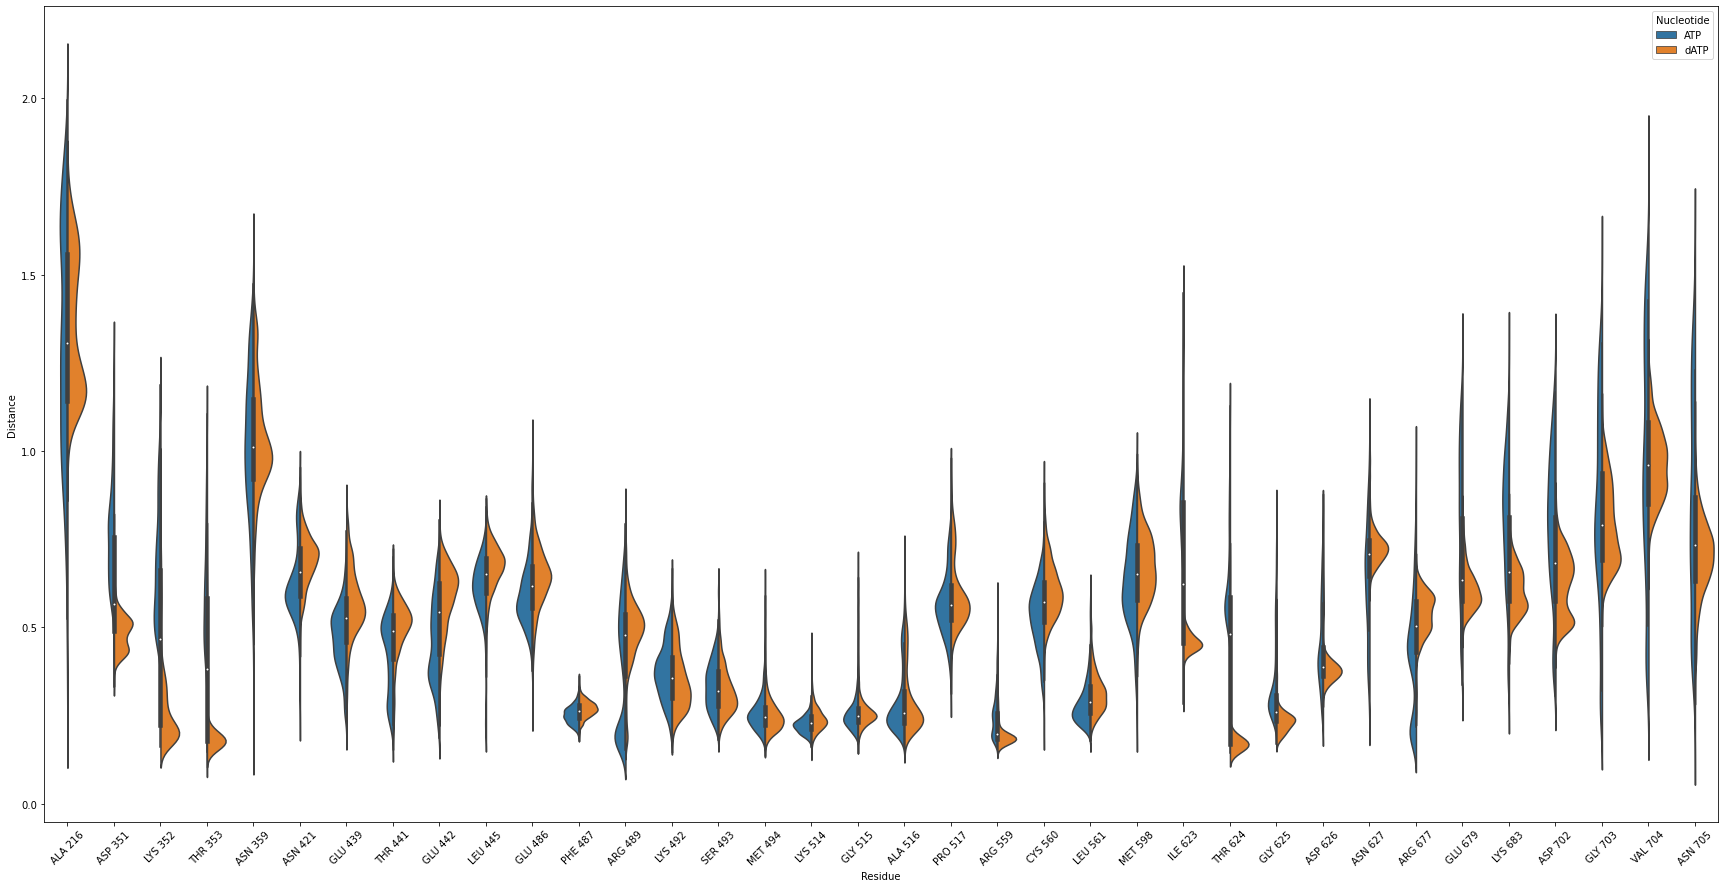

In [382]:
plt.figure(figsize = (30,15))
sns.violinplot(data=contact_df, x="Residue", y="Distance", hue="Nucleotide", split = True)
plt.xticks(rotation=45)
plt.show()

### Species Comparison

In [493]:
original_complete_corrected_union = np.union1d(original_all_close_contacts, 
                                               np.union1d(all_close_contacts[all_close_contacts>509]+1,
                                               all_close_contacts[all_close_contacts<509]))

original_complete_corrected_union


array([154, 169, 173, 214, 215, 216, 217, 350, 351, 352, 353, 358, 360,
       420, 421, 435, 438, 439, 440, 441, 444, 485, 486, 487, 488, 491,
       492, 493, 514, 515, 516, 517, 518, 559, 560, 561, 598, 623, 624,
       625, 626, 627, 677, 678, 679, 680, 683, 702, 703, 704, 705, 706])

In [497]:
human_complete_corrected_union = np.union1d(all_close_contacts, 
                                               np.union1d(original_all_close_contacts[original_all_close_contacts>509]-1,
                                               original_all_close_contacts[original_all_close_contacts<509]))

human_complete_corrected_union

array([154, 169, 173, 214, 215, 216, 217, 350, 351, 352, 353, 358, 360,
       420, 421, 435, 438, 439, 440, 441, 444, 485, 486, 487, 488, 491,
       492, 493, 513, 514, 515, 516, 517, 558, 559, 560, 597, 622, 623,
       624, 625, 626, 676, 677, 678, 679, 682, 701, 702, 703, 704, 705])

In [556]:
superset_residue_list = []
for i in range(len(original_complete_corrected_union)):
    #print(original_3W5A_ATP.top.residue(original_complete_corrected_union[i]),
    #      human_3W5A_ATP.top.residue(human_complete_corrected_union[i]))
    
    if original_3W5A_ATP.top.residue(original_complete_corrected_union[i]).code == human_3W5A_ATP.top.residue(human_complete_corrected_union[i]).code:
        if original_3W5A_ATP.top.residue(original_complete_corrected_union[i]).index == human_3W5A_ATP.top.residue(human_complete_corrected_union[i]).index:
            print_name = original_3W5A_ATP.top.residue(original_complete_corrected_union[i]).name + ' {}'.format(original_3W5A_ATP.top.residue(original_complete_corrected_union[i]).index)
            print(print_name)
            superset_residue_list.append([print_name]*traj_len)
            
        else:
            print_name = original_3W5A_ATP.top.residue(original_complete_corrected_union[i]).name + ' {}/{}'.format(
            original_3W5A_ATP.top.residue(original_complete_corrected_union[i]).index,
            human_3W5A_ATP.top.residue(human_complete_corrected_union[i]).index)
            print(print_name)
            superset_residue_list.append([print_name]*traj_len)

VAL 154
SER 169
ARG 173
ALA 214
ALA 215
GLY 216
LYS 217
ASP 350
LYS 351
THR 352
GLY 353
ASN 358
MET 360
ASN 420
ASP 421
LYS 435
GLU 438
ALA 439
THR 440
GLU 441
LEU 444
GLU 485
PHE 486
SER 487
ARG 488
LYS 491
SER 492
MET 493
LYS 514/513
GLY 515/514
ALA 516/515
PRO 517/516
GLU 518/517
ARG 559/558
CYS 560/559
LEU 561/560
MET 598/597
ILE 623/622
THR 624/623
GLY 625/624
ASP 626/625
ASN 627/626
ARG 677/676
VAL 678/677
GLU 679/678
PRO 680/679
LYS 683/682
ASP 702/701
GLY 703/702
VAL 704/703
ASN 705/704
ASP 706/705


In [569]:
complete_residue_list = np.array(superset_residue_list*4).flatten()

### Original Superset

In [517]:
# Create dataframe to store the contact data in

contact_df_column_names = ['Nucleotide','Residue','Frame','Distance']
original_traj_len = len(original_3W5A_ATP)
original_index_len = len(original_complete_corrected_union)
# Multiply by two for ATP and dATP
original_all_contact_array = np.zeros((original_traj_len*original_index_len*2, 4))
original_half_point = original_traj_len*original_index_len

for i in range(original_index_len):
    index = original_complete_corrected_union[i]
    start = i*original_traj_len
    stop = (i+1)*original_traj_len
    original_all_contact_array[start:stop,1] = int(index)
    original_all_contact_array[start:stop,2] = np.arange(original_traj_len)
    original_all_contact_array[start:stop,3] = contact_original_ATP_dist[:,index]
    
    start = i*traj_len + original_half_point
    stop = (i+1)*traj_len + original_half_point
    original_all_contact_array[start:stop,1] = int(index)
    original_all_contact_array[start:stop,2] = np.arange(original_traj_len)
    original_all_contact_array[start:stop,3] = contact_original_dATP_dist[:,index]

In [518]:
original_contact_df = pd.DataFrame(original_all_contact_array, columns = contact_df_column_names)

original_contact_df['Nucleotide'][0:original_half_point] = 'ATP'
original_contact_df['Nucleotide'][original_half_point:2*original_half_point] = 'dATP'
original_residue_list = ['empty']*len(original_contact_df)
for i in range(original_half_point):
    
    correct_index = int(original_contact_df.loc[i,'Residue'])
    
    original_residue_list[i] = original_3W5A_ATP.top.residue(correct_index).name + ' {}'.format(correct_index+1)
    
    correct_index = int(original_contact_df.loc[original_half_point+i,'Residue'])
    
    original_residue_list[i+original_half_point] = original_3W5A_dATP.top.residue(correct_index).name + ' {}'.format(correct_index+1)
    
original_contact_df['Residue'] = original_residue_list

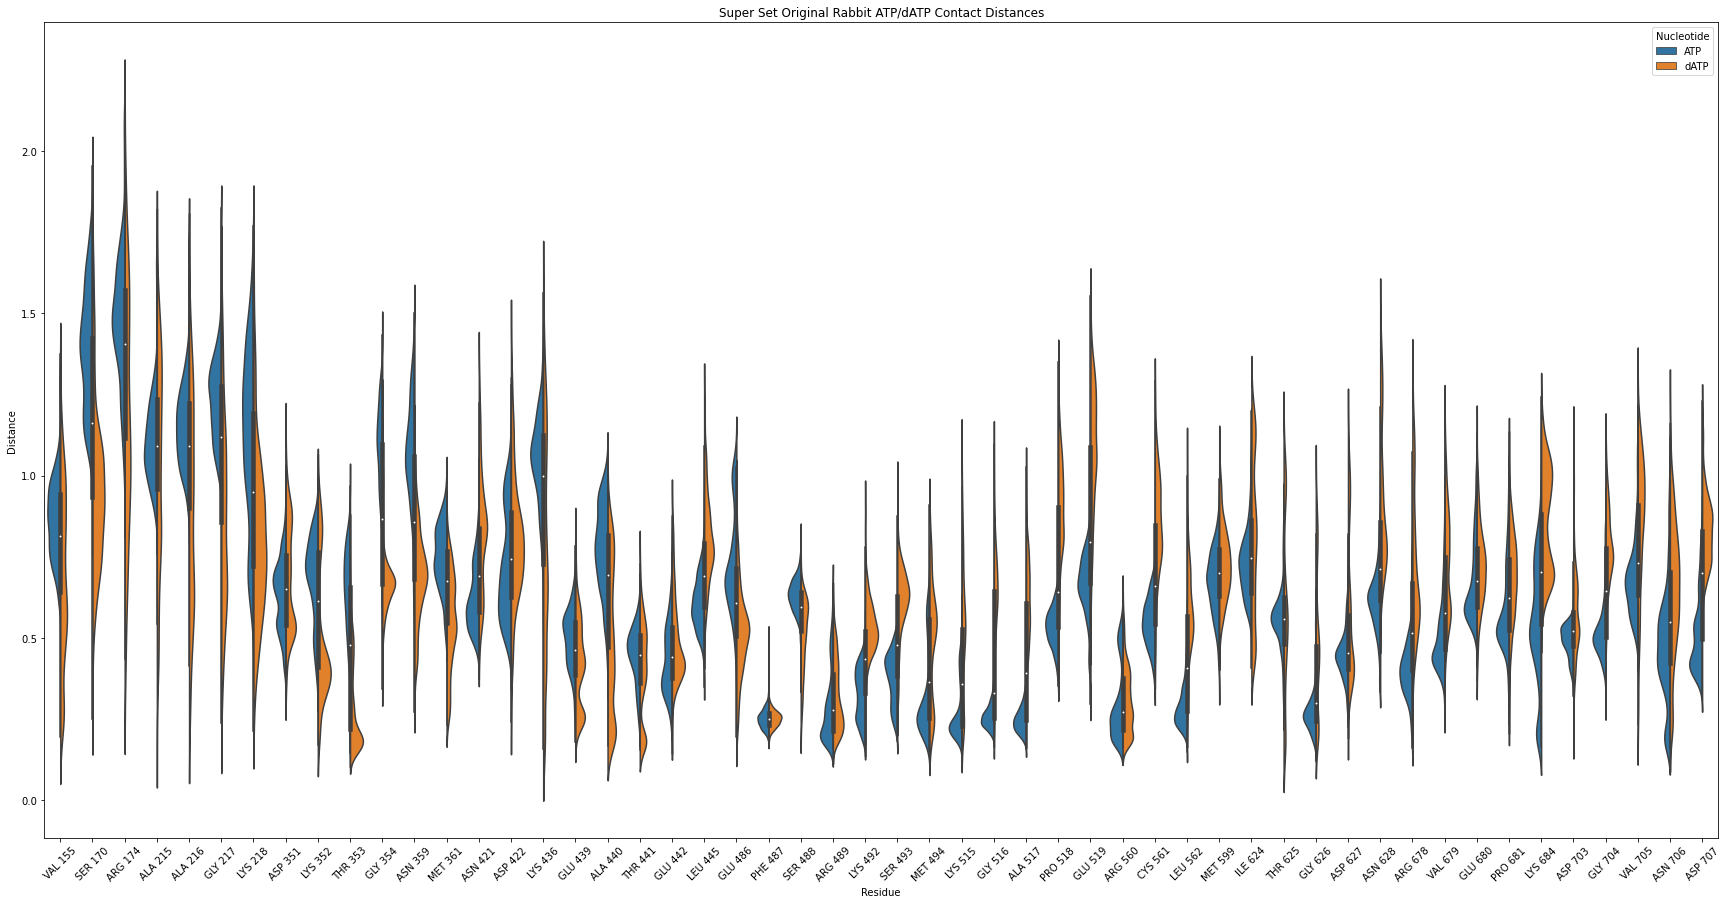

In [519]:
plt.figure(figsize = (30,15))
sns.violinplot(data=original_contact_df, x="Residue", y="Distance", hue="Nucleotide", split = True)
plt.xticks(rotation=45)
plt.title('Super Set Original Rabbit ATP/dATP Contact Distances')
plt.show()

### Human Superset
Note be careful of the order of running things

In [510]:
contact_df_column_names = ['Nucleotide','Residue','Frame','Distance']
traj_len = len(human_3W5A_ATP)
index_len = len(human_complete_corrected_union)
# Multiply by two for ATP and dATP
all_contact_array = np.zeros((traj_len*index_len*2, 4))
half_point = traj_len*index_len

for i in range(index_len):
    index = human_complete_corrected_union[i]
    start = i*traj_len
    stop = (i+1)*traj_len
    all_contact_array[start:stop,1] = int(index)
    all_contact_array[start:stop,2] = np.arange(traj_len)
    all_contact_array[start:stop,3] = contact_human_ATP_dist[:,index]
    
    start = i*traj_len + half_point
    stop = (i+1)*traj_len + half_point
    all_contact_array[start:stop,1] = int(index)
    all_contact_array[start:stop,2] = np.arange(traj_len)
    all_contact_array[start:stop,3] = contact_human_dATP_dist[:,index]
    

In [511]:
contact_df = pd.DataFrame(all_contact_array, columns = contact_df_column_names)
contact_df['Nucleotide'][0:half_point] = 'ATP'
contact_df['Nucleotide'][half_point:2*half_point] = 'dATP'
residue_list = ['empty']*len(contact_df)
for i in range(half_point):
    
    correct_index = int(contact_df.loc[i,'Residue'])
    
    residue_list[i] = human_3W5A_ATP.top.residue(correct_index).name + ' {}'.format(correct_index+1)
    
    correct_index = int(contact_df.loc[half_point+i,'Residue'])
    
    residue_list[i+half_point] = human_3W5A_dATP.top.residue(correct_index).name + ' {}'.format(correct_index+1)
    
contact_df['Residue'] = residue_list

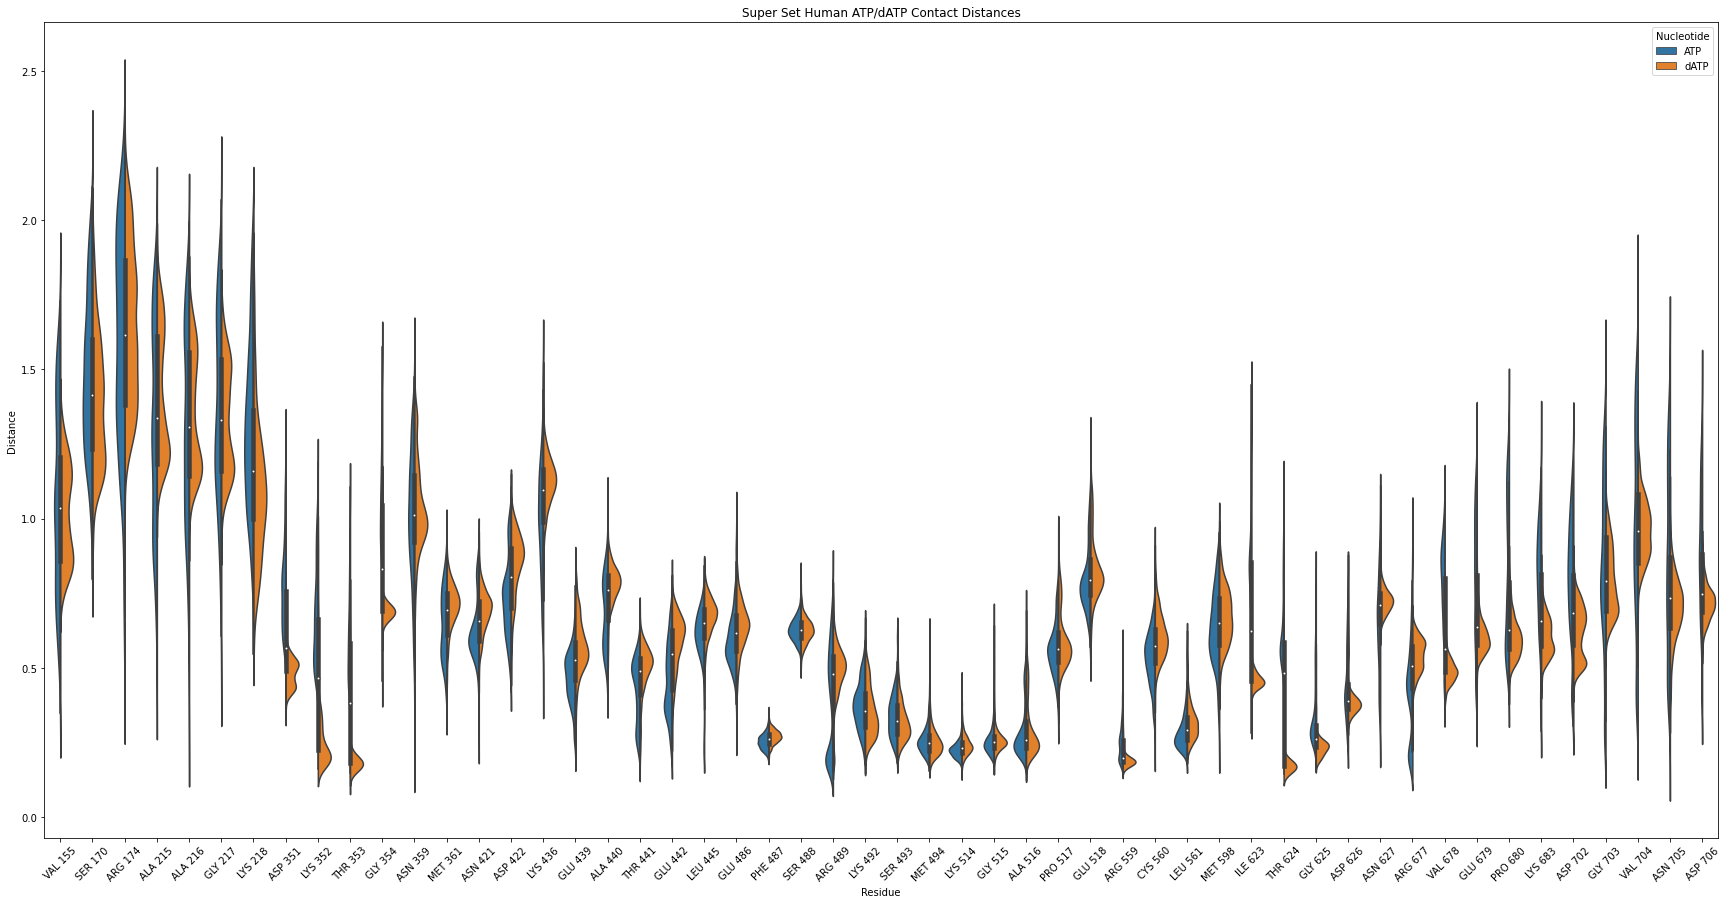

In [516]:
plt.figure(figsize = (30,15))
plt.title('Super Set Human ATP/dATP Contact Distances')
sns.violinplot(data=contact_df, x="Residue", y="Distance", hue="Nucleotide", split = True)
plt.xticks(rotation=45)
plt.show()

In [573]:
superset_df = pd.concat((original_contact_df, contact_df))
superset_df.reset_index(inplace = True)
superset_df['Simulation'] = 'NA'
superset_df['Residue'] = complete_residue_list

In [574]:
superset_df.loc[0,'Simulation'] = 'Human ATP'
j = 0 
for i in range(j*len(superset_df)//4,(j+1)*len(superset_df)//4):
    superset_df.loc[i,'Simulation'] = 'Original ATP'
    
j = 1
for i in range(j*len(superset_df)//4,(j+1)*len(superset_df)//4):
    superset_df.loc[i,'Simulation'] = 'Original dATP'
    
j = 2
for i in range(j*len(superset_df)//4,(j+1)*len(superset_df)//4):
    superset_df.loc[i,'Simulation'] = 'Human ATP'

j = 3
for i in range(j*len(superset_df)//4,(j+1)*len(superset_df)//4):
    superset_df.loc[i,'Simulation'] = 'Human dATP'

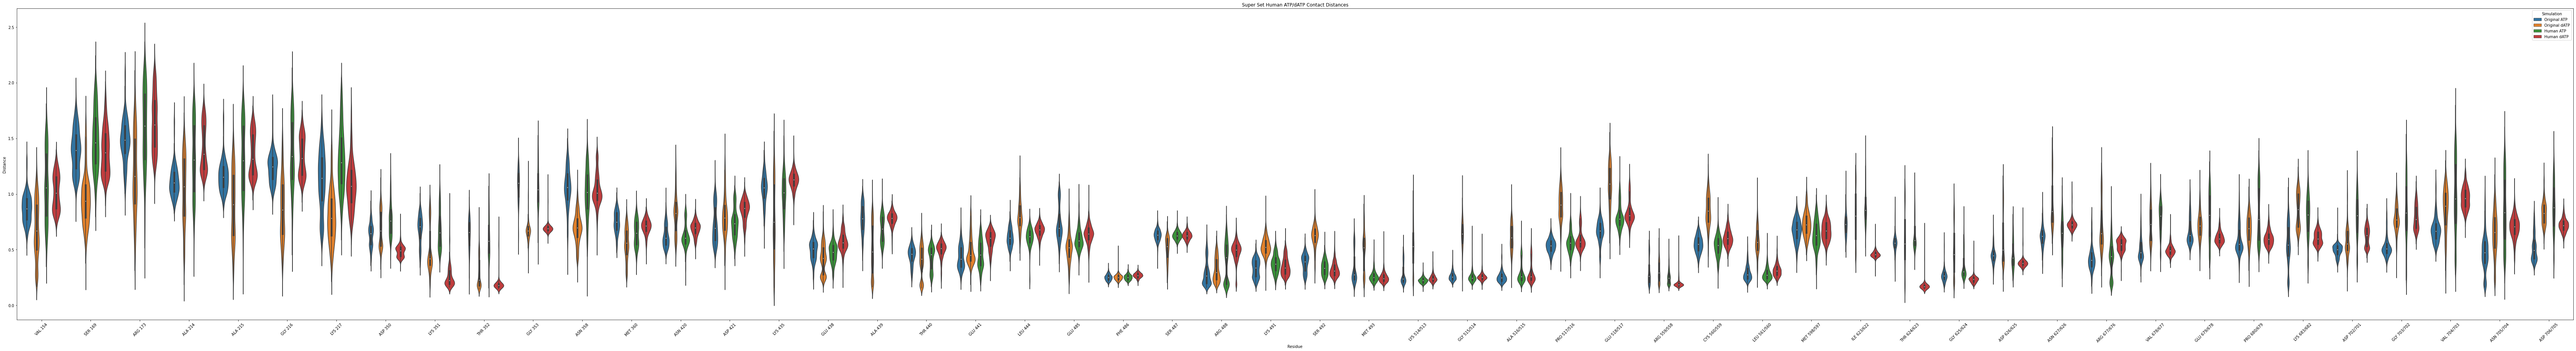

In [592]:
plt.figure(figsize = (120,15))
plt.title('Super Set Human ATP/dATP Contact Distances')
sns.violinplot(data=superset_df, x="Residue", y="Distance", hue="Simulation", split = False)
plt.xticks(rotation=45)
plt.savefig('superset_violinplot.jpg')
plt.show()

In [579]:
superset_df.to_csv('superset_df.csv')

### Old Residue Measurements

In [354]:
residue = 'ALA 216'

stats.ttest_ind(contact_df[(contact_df.Residue == residue) &
           (contact_df.Nucleotide == 'ATP')].Distance, 
                contact_df[(contact_df.Residue == residue) &
           (contact_df.Nucleotide == 'dATP')].Distance)

Ttest_indResult(statistic=-4.768205889603933, pvalue=1.9474136275258518e-06)

In [ ]:
stats.ttest_ind()

In [337]:
contact_human_ATP_dist[:,487]

array([0.5724689 , 0.6375921 , 0.65632963, ..., 0.6585774 , 0.56763464,
       0.6597407 ], dtype=float32)

In [338]:
human_3W5A_ATP.top.residue(index).name+' {}'.format(index)

'ASN 704'

In [311]:
human_3W5A_ATP.top.residue(487)

SER487

In [241]:
n = 10

# Sorting by closest to ATP only 

print("\nOriginal Closest {} ATP Pairs:".format(n))
for i in range(n):
    index = np.argsort(contact_original_ATP_dist[-1])[i]
    
    
    resID = pairs_original[index][1]
    print(original_3W5A_ATP.top.residue(resID), end = '\t')
    print(resID,end='\t')
    print(contact_original_ATP_dist[-1,index])

# Sorting by closest to dATP only 
print("\nOriginal Closest {} dATP Pairs:".format(n))
for i in range(n):
    index = np.argsort(contact_original_dATP_dist[-1])[i]
    
    resID = pairs_original[index][1]
    print(original_3W5A_dATP.top.residue(resID), end = '\t')
    print(resID,end='\t')
    print(contact_original_dATP_dist[-1,index])

### Human 
# Sorting by closest to ATP only 
print("\nHuman Closest {} ATP Pairs:".format(n))
for i in range(n):
    index = np.argsort(contact_human_ATP_dist[-1])[i]
    
    resID = pairs_human[index][1]
    print(human_3W5A_ATP.top.residue(resID), end = '\t')
    print(resID,end='\t')
    print(contact_human_ATP_dist[-1,index])
    

# Sorting by closest to dATP only 
n = 10
print("\nHuman Closest {} dATP Pairs:".format(n))
for i in range(n):
    index = np.argsort(contact_human_dATP_dist[-1])[i]
    
    resID = pairs_human[index][1]
    print(human_3W5A_dATP.top.residue(resID), end = '\t')
    print(resID,end='\t')
    print(contact_human_dATP_dist[-1,index])



Original Closest 10 ATP Pairs:
ARG488	488	0.18536483
ASN705	705	0.18970378
GLY625	625	0.20979531
LYS491	491	0.22257856
GLY515	515	0.23441452
PHE486	486	0.2451559
ALA516	516	0.26294872
ARG559	559	0.2711381
THR440	440	0.3005202
LEU561	561	0.31136084

Original Closest 10 dATP Pairs:
ARG559	559	0.2063238
PHE486	486	0.25284842
ARG488	488	0.3620776
MET493	493	0.3713615
LYS491	491	0.37982103
LYS351	351	0.40060908
VAL154	154	0.41647443
ASP626	626	0.417528
ALA516	516	0.46809715
GLY625	625	0.47184876

Human Closest 10 ATP Pairs:
GLY624	624	0.22195104
ARG558	558	0.22764184
PHE486	486	0.23308098
GLY514	514	0.24337399
LEU560	560	0.24946344
LYS513	513	0.25344735
ALA515	515	0.31058046
MET493	493	0.3860731
GLU438	438	0.3951349
ARG488	488	0.4037195

Human Closest 10 dATP Pairs:
THR623	623	0.16246529
THR352	352	0.17760691
ARG558	558	0.18037058
LYS351	351	0.1904352
LYS513	513	0.19967578
MET493	493	0.20225652
PHE486	486	0.22743273
GLY624	624	0.2296562
GLY514	514	0.27183753
LEU560	560	0.27998474


<Figure size 720x576 with 0 Axes>

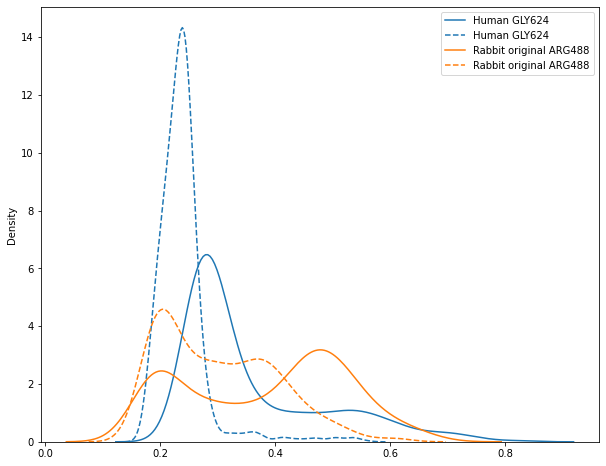

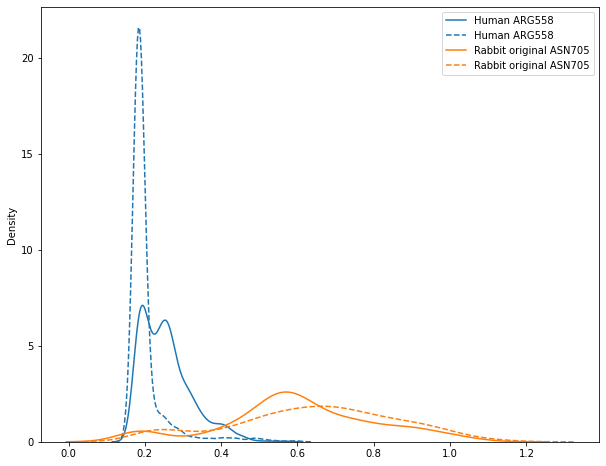

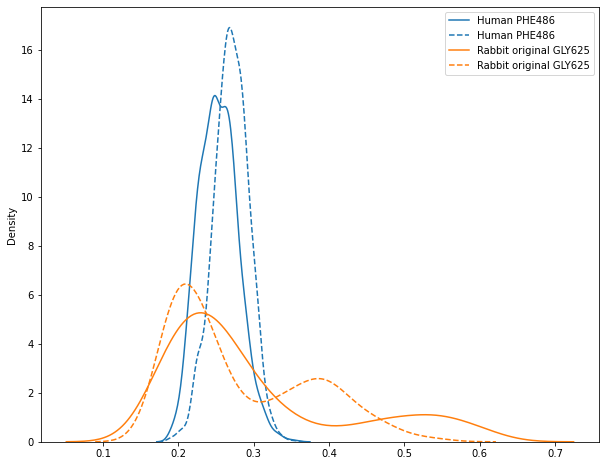

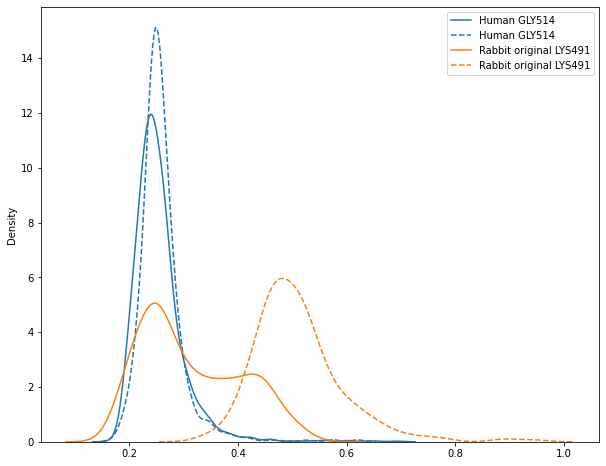

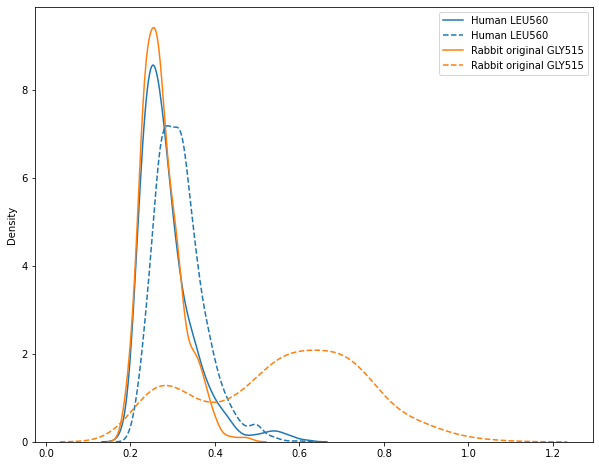

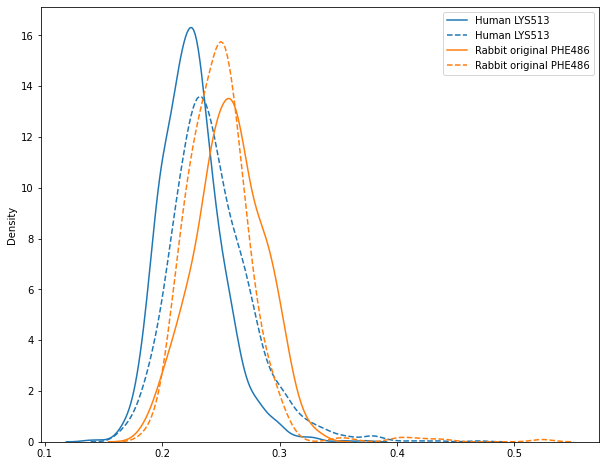

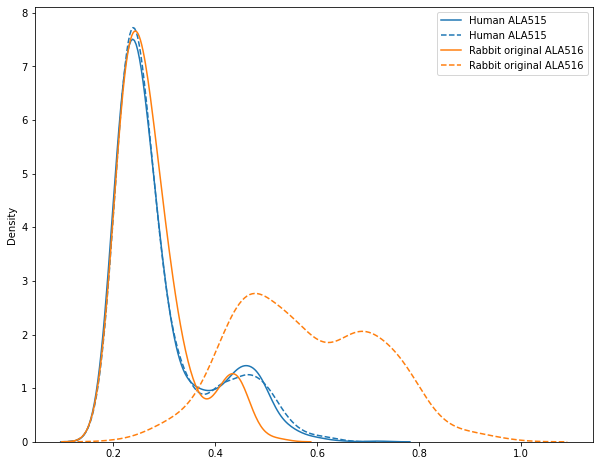

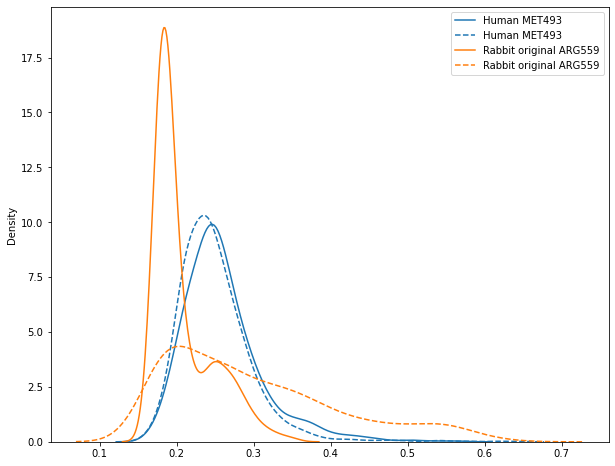

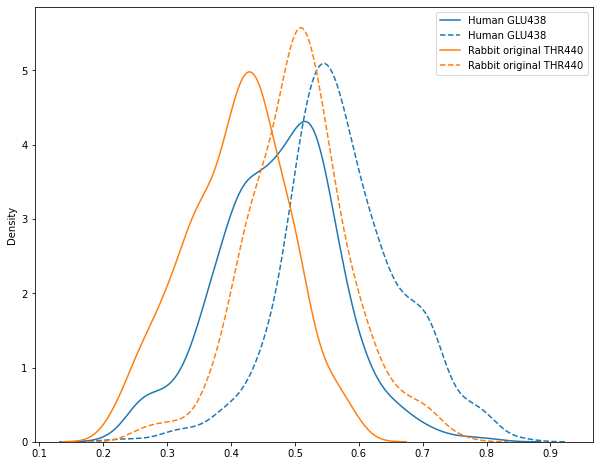

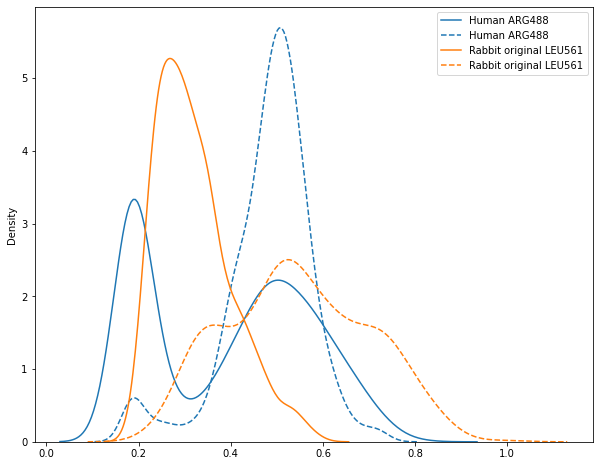

In [243]:
plt.figure(figsize = (10,8))
colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','C0']
n= 10

'''for i in range(n):
    
    index = np.argsort(contact_human_ATP_dist[-1])[i]
    
    plt.plot(contact_human_ATP_dist[:,index])
    plt.plot(contact_human_dATP_dist[:,index])'''
    
for i in range(n):
    plt.figure(figsize = (10,8))
    
    index = np.argsort(contact_human_ATP_dist[-1])[i]
    
    residue = pairs_human[index][1]
    sns.kdeplot(contact_human_ATP_dist[:,index], 
                label = 'Human '+ str(human_3W5A_ATP.top.residue(residue)), 
                color = colors[0],
               )
    sns.kdeplot(contact_human_dATP_dist[:,index], 
                label = 'Human '+str(human_3W5A_dATP.top.residue(residue)), 
                color = colors[0],
               linestyle = '--')
    plt.legend()    

    index = np.argsort(contact_original_ATP_dist[-1])[i]
    
    residue = pairs_original[index][1]
    sns.kdeplot(contact_original_ATP_dist[:,index], 
                label = 'Rabbit original '+str(original_3W5A_ATP.top.residue(residue)), 
                color = colors[1],
               )
    sns.kdeplot(contact_original_dATP_dist[:,index], 
                label = 'Rabbit original '+str(original_3W5A_dATP.top.residue(residue)), 
                color = colors[1],
               linestyle = '--')
    plt.legend()    
    
    

In [244]:
def strongest_contacts(contact_distance, pair_list, start_average = 0.8, end_average = 1.0):
    n_frames, n_contacts = contact_distance.shape
    start_ind = int(start_average*n_frames)
    end_ind = int(end_average*n_frames)
    means_list = contact_distance[start_ind:end_ind,:].mean(axis = 0)
    return means_list
    

In [245]:
contact_human_ATP_dist.mean(axis = 0)[5]

3.6527195

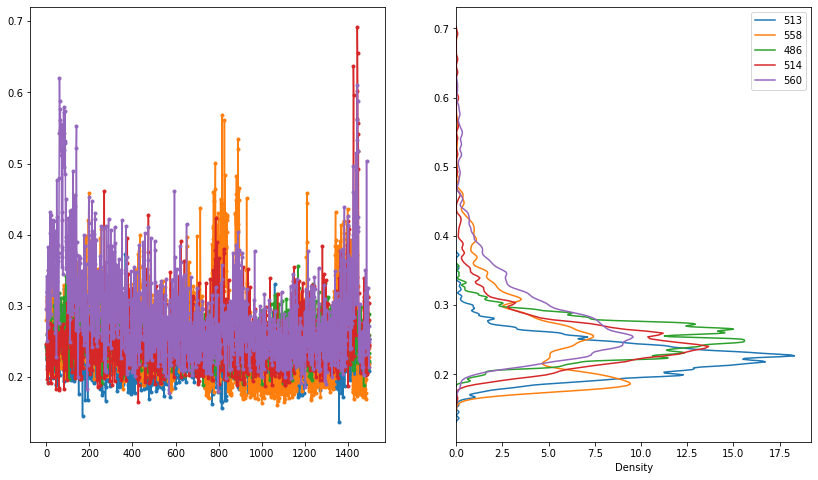

In [246]:
indices = np.argsort(strongest_contacts(contact_human_ATP_dist, pairs_human, 0.5,1))
fig, ax = plt.subplots(1,2,figsize = (14,8))
for i in range(5):
    ax[0].plot(contact_human_ATP_dist[:,indices[i]],'.-')
    sns.kdeplot(y = contact_human_ATP_dist[:,indices[i]],
                label = indices[i],
               bw_adjust = 0.3)
    ax[1].legend()

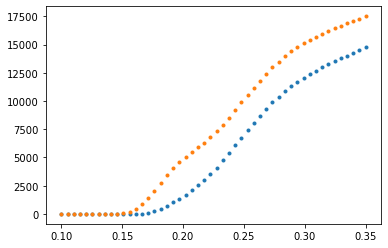

In [247]:
# Distnace cutoff set to 0.3 nm (or Angstroms?)
for i in np.linspace(0.1,0.35):
    plt.plot(i,np.sum(contact_human_ATP_dist<i),'.',color = 'C0')
    plt.plot(i,np.sum(contact_human_dATP_dist<i),'.',color = 'C1')

In [362]:
human_3W5A_ATP.top.residue(0).code

'M'